# Problem Statement:
# Task 1:-Prepare a complete data analysis report on the given data.
# Task 2:-Create a predictive model with implementation of different classifiers on liver patient diseases dataset to predict liver diseases.
# Task3:- Create an analysis to show on what basis you have designed your model.

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset:

In [2]:
df=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df

,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


There are no column names are allocated for this dataset, So we need to give the column names according to the data provided.

In [3]:
df.columns =['Age of the patient','Gender of the patient','Total Bilirubin','Direct Bilirubin','Alkaline Phosphotase',
            'Alamine Aminotransferase','Aspartate Aminotransferase','Total Protiens','Albumin','Albumin and Globulin Ratio',
            'Target']

In [4]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In this dataset Target value has '1' for liver disease and '2' for no liver disease so let's make it 0 for no disease to make it convinient.

In [5]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

df['Target'] = df['Target'].map(partition)

# Domain Analysis:

# What are Bilirubin and Direct Bilirubin?
# It is a yellowish pigment that is made during the breakdown of red blood cells. Bilirubin passes through the liver and is eventually excreted out of the body.
# Direct bilirubin is formed by the breakdown of hemoglobin in the red blood cells. The liver converts this bilirubin into direct bilirubin, which can then be released into the intestine by the gallbladder for elimination.

# What are Alkaline Phosphotase,Alamine Aminotransferase and Aspartate Aminotransferase:
# Alkaline phosphatase (ALP) is an enzyme that’s found throughout your body. ALP blood tests measure the level of ALP in your blood that comes from your liver and bones.
# Alamine aminotransferase (ALT) is an enzyme produced primarily in liver and kidney cells.
# Aspartate aminotransferase (AST) is an enzyme that is mostly found in the liver, but it is also present in other parts of the body.

# Basic Checks:

In [6]:
df.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


In [7]:
df.tail()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
581,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [8]:
df.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,578.000000,582.000000
mean,44.711340,3.303265,1.488488,290.754296,80.824742,110.068729,6.482646,3.141581,0.947145,0.713058
std,16.181921,6.213926,2.810324,243.108929,182.757696,289.141876,1.086306,0.796176,0.319863,0.452723
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.250000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.940000,1.000000
75%,57.750000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age of the patient          582 non-null    int64  
 1   Gender of the patient       582 non-null    object 
 2   Total Bilirubin             582 non-null    float64
 3   Direct Bilirubin            582 non-null    float64
 4   Alkaline Phosphotase        582 non-null    int64  
 5   Alamine Aminotransferase    582 non-null    int64  
 6   Aspartate Aminotransferase  582 non-null    int64  
 7   Total Protiens              582 non-null    float64
 8   Albumin                     582 non-null    float64
 9   Albumin and Globulin Ratio  578 non-null    float64
 10  Target                      582 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.1+ KB


There are no missing values present in the data

In [10]:
df.duplicated().sum()

13

Comparing the duplicated values with the data there are only a minimum number of duplicated values, So we can leave or we don't want to handle the duplicated values and also removal of duplicated values may result in the loss of important datas.Retaining duplicates can enhance the accuracy and effectiveness of the model.

In [11]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Exploratory Data Analysis:

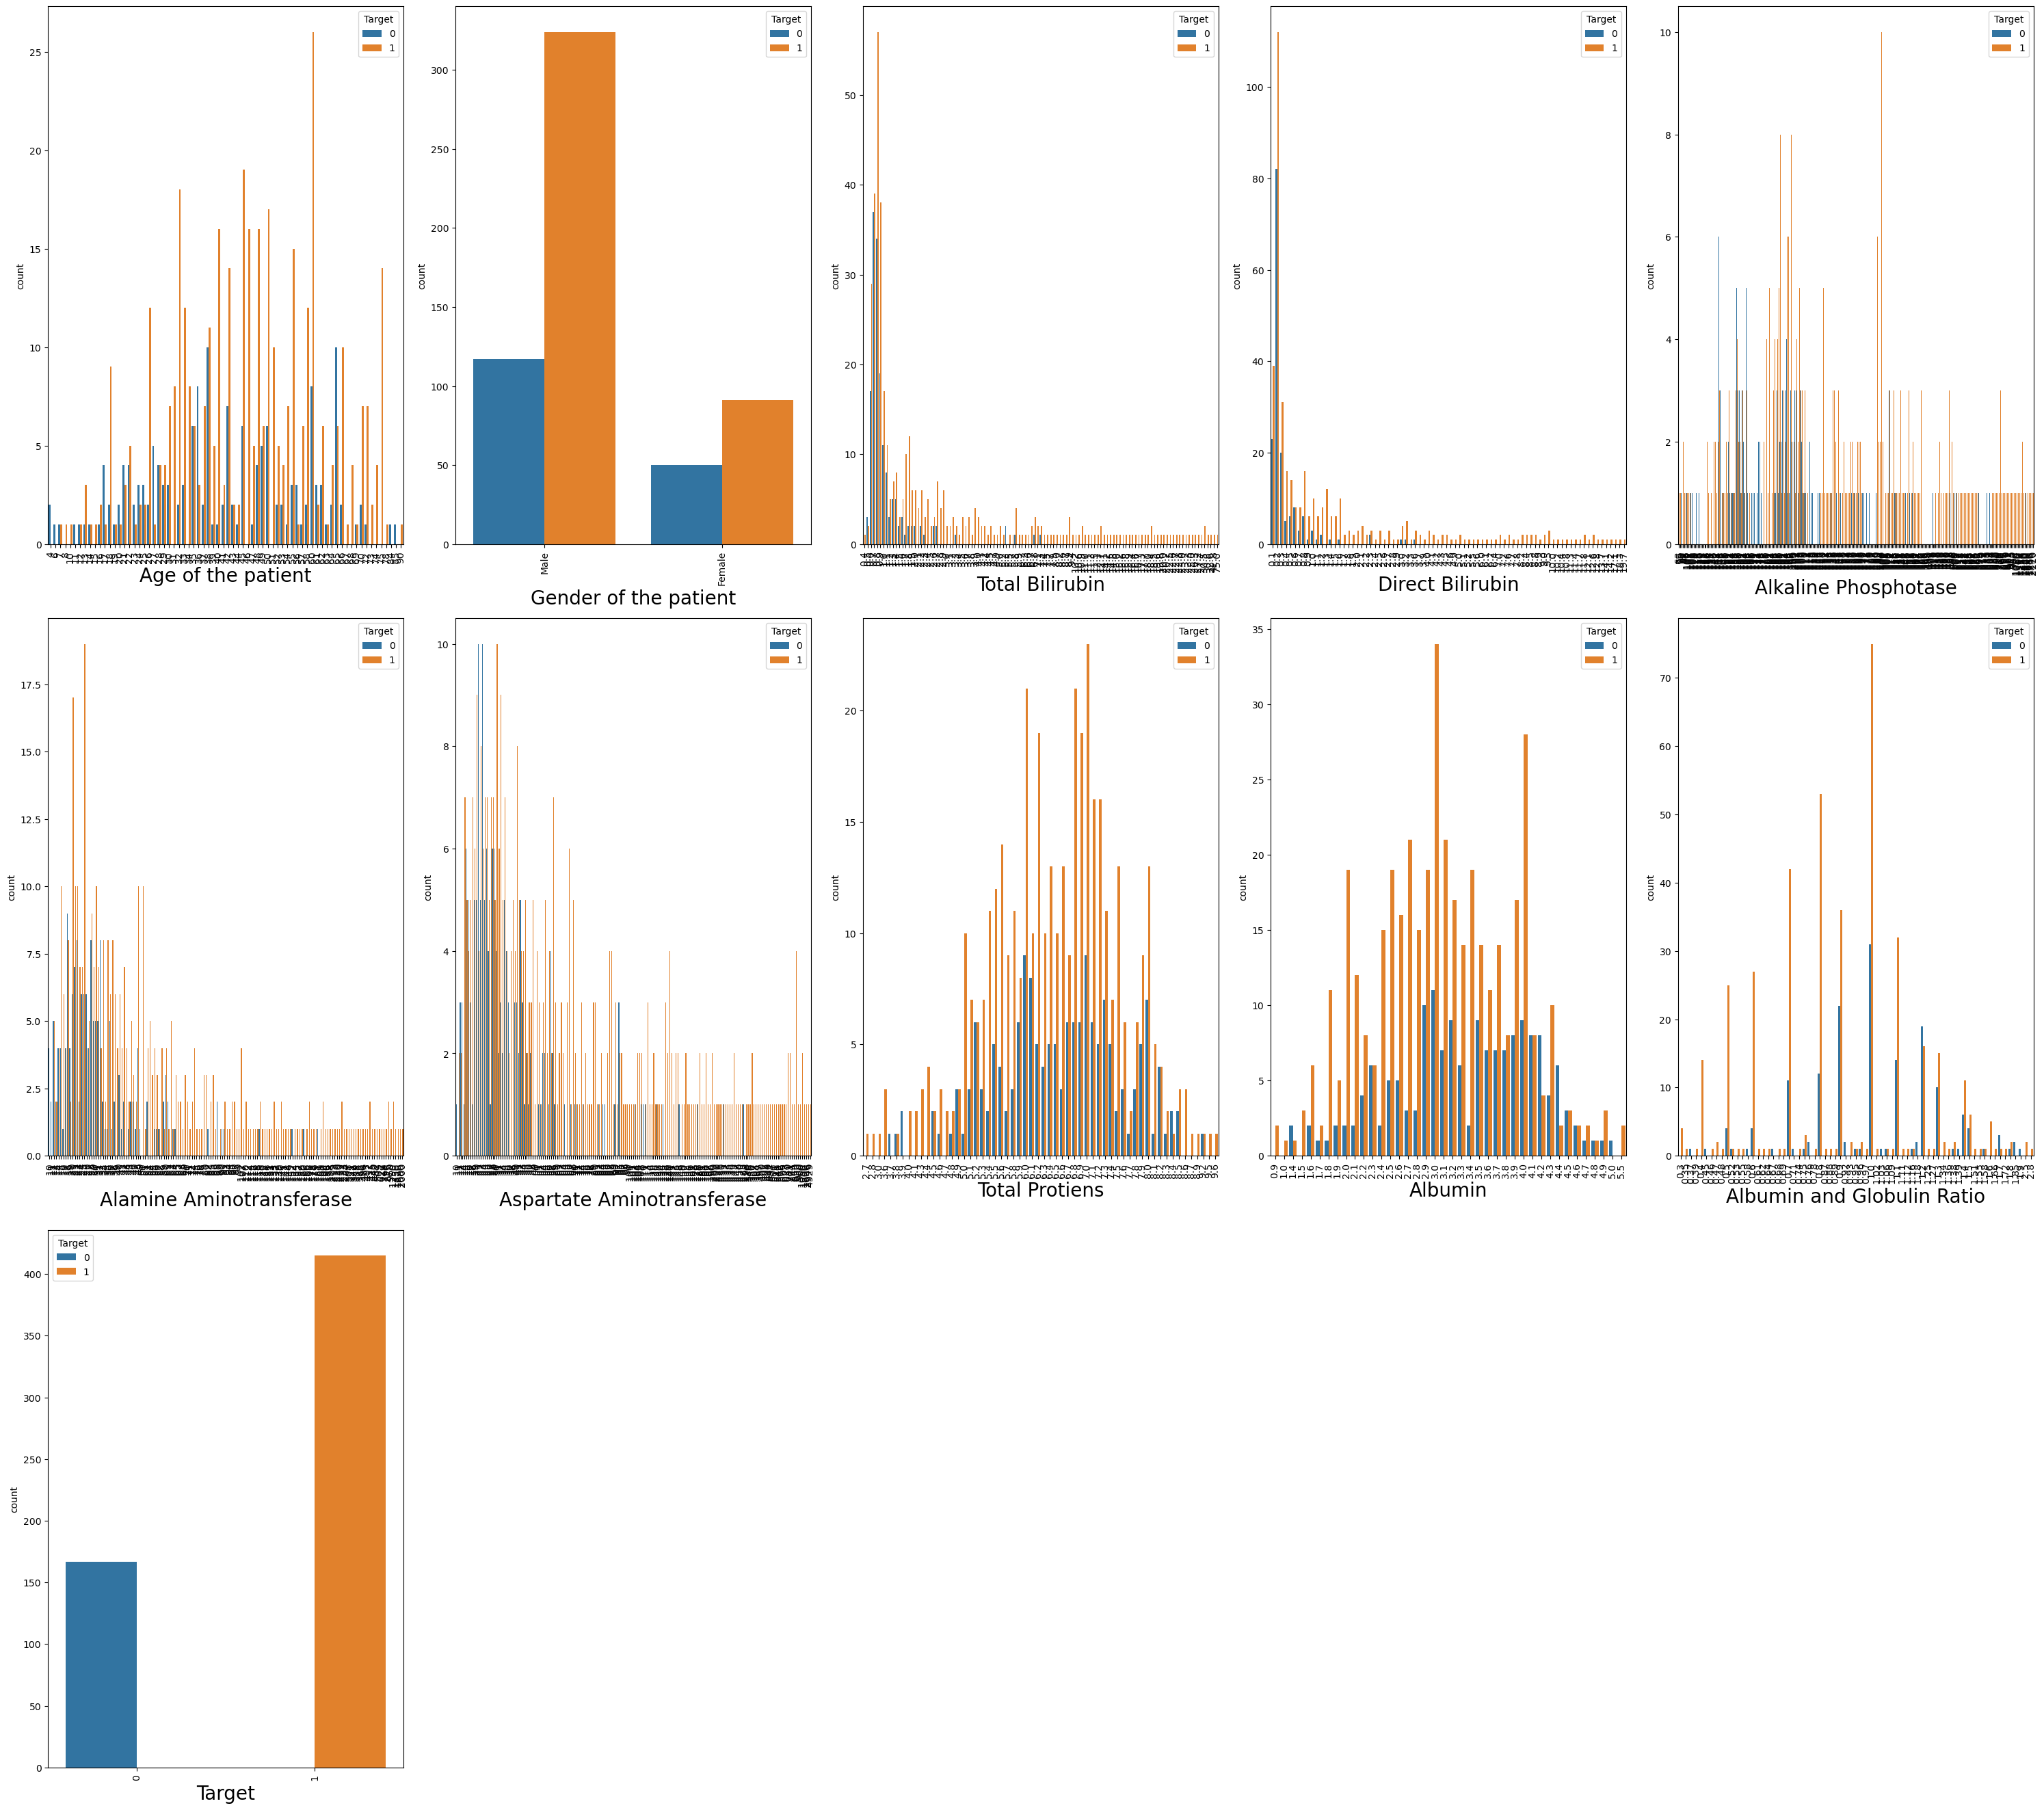

In [12]:
plt.figure(figsize=(30,35))
plotnumber=1
for column in df:
    ax=plt.subplot(4,5,plotnumber)
    sns.countplot(x=df[column],hue=df['Target'])
    plt.xlabel(column,fontsize=20)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

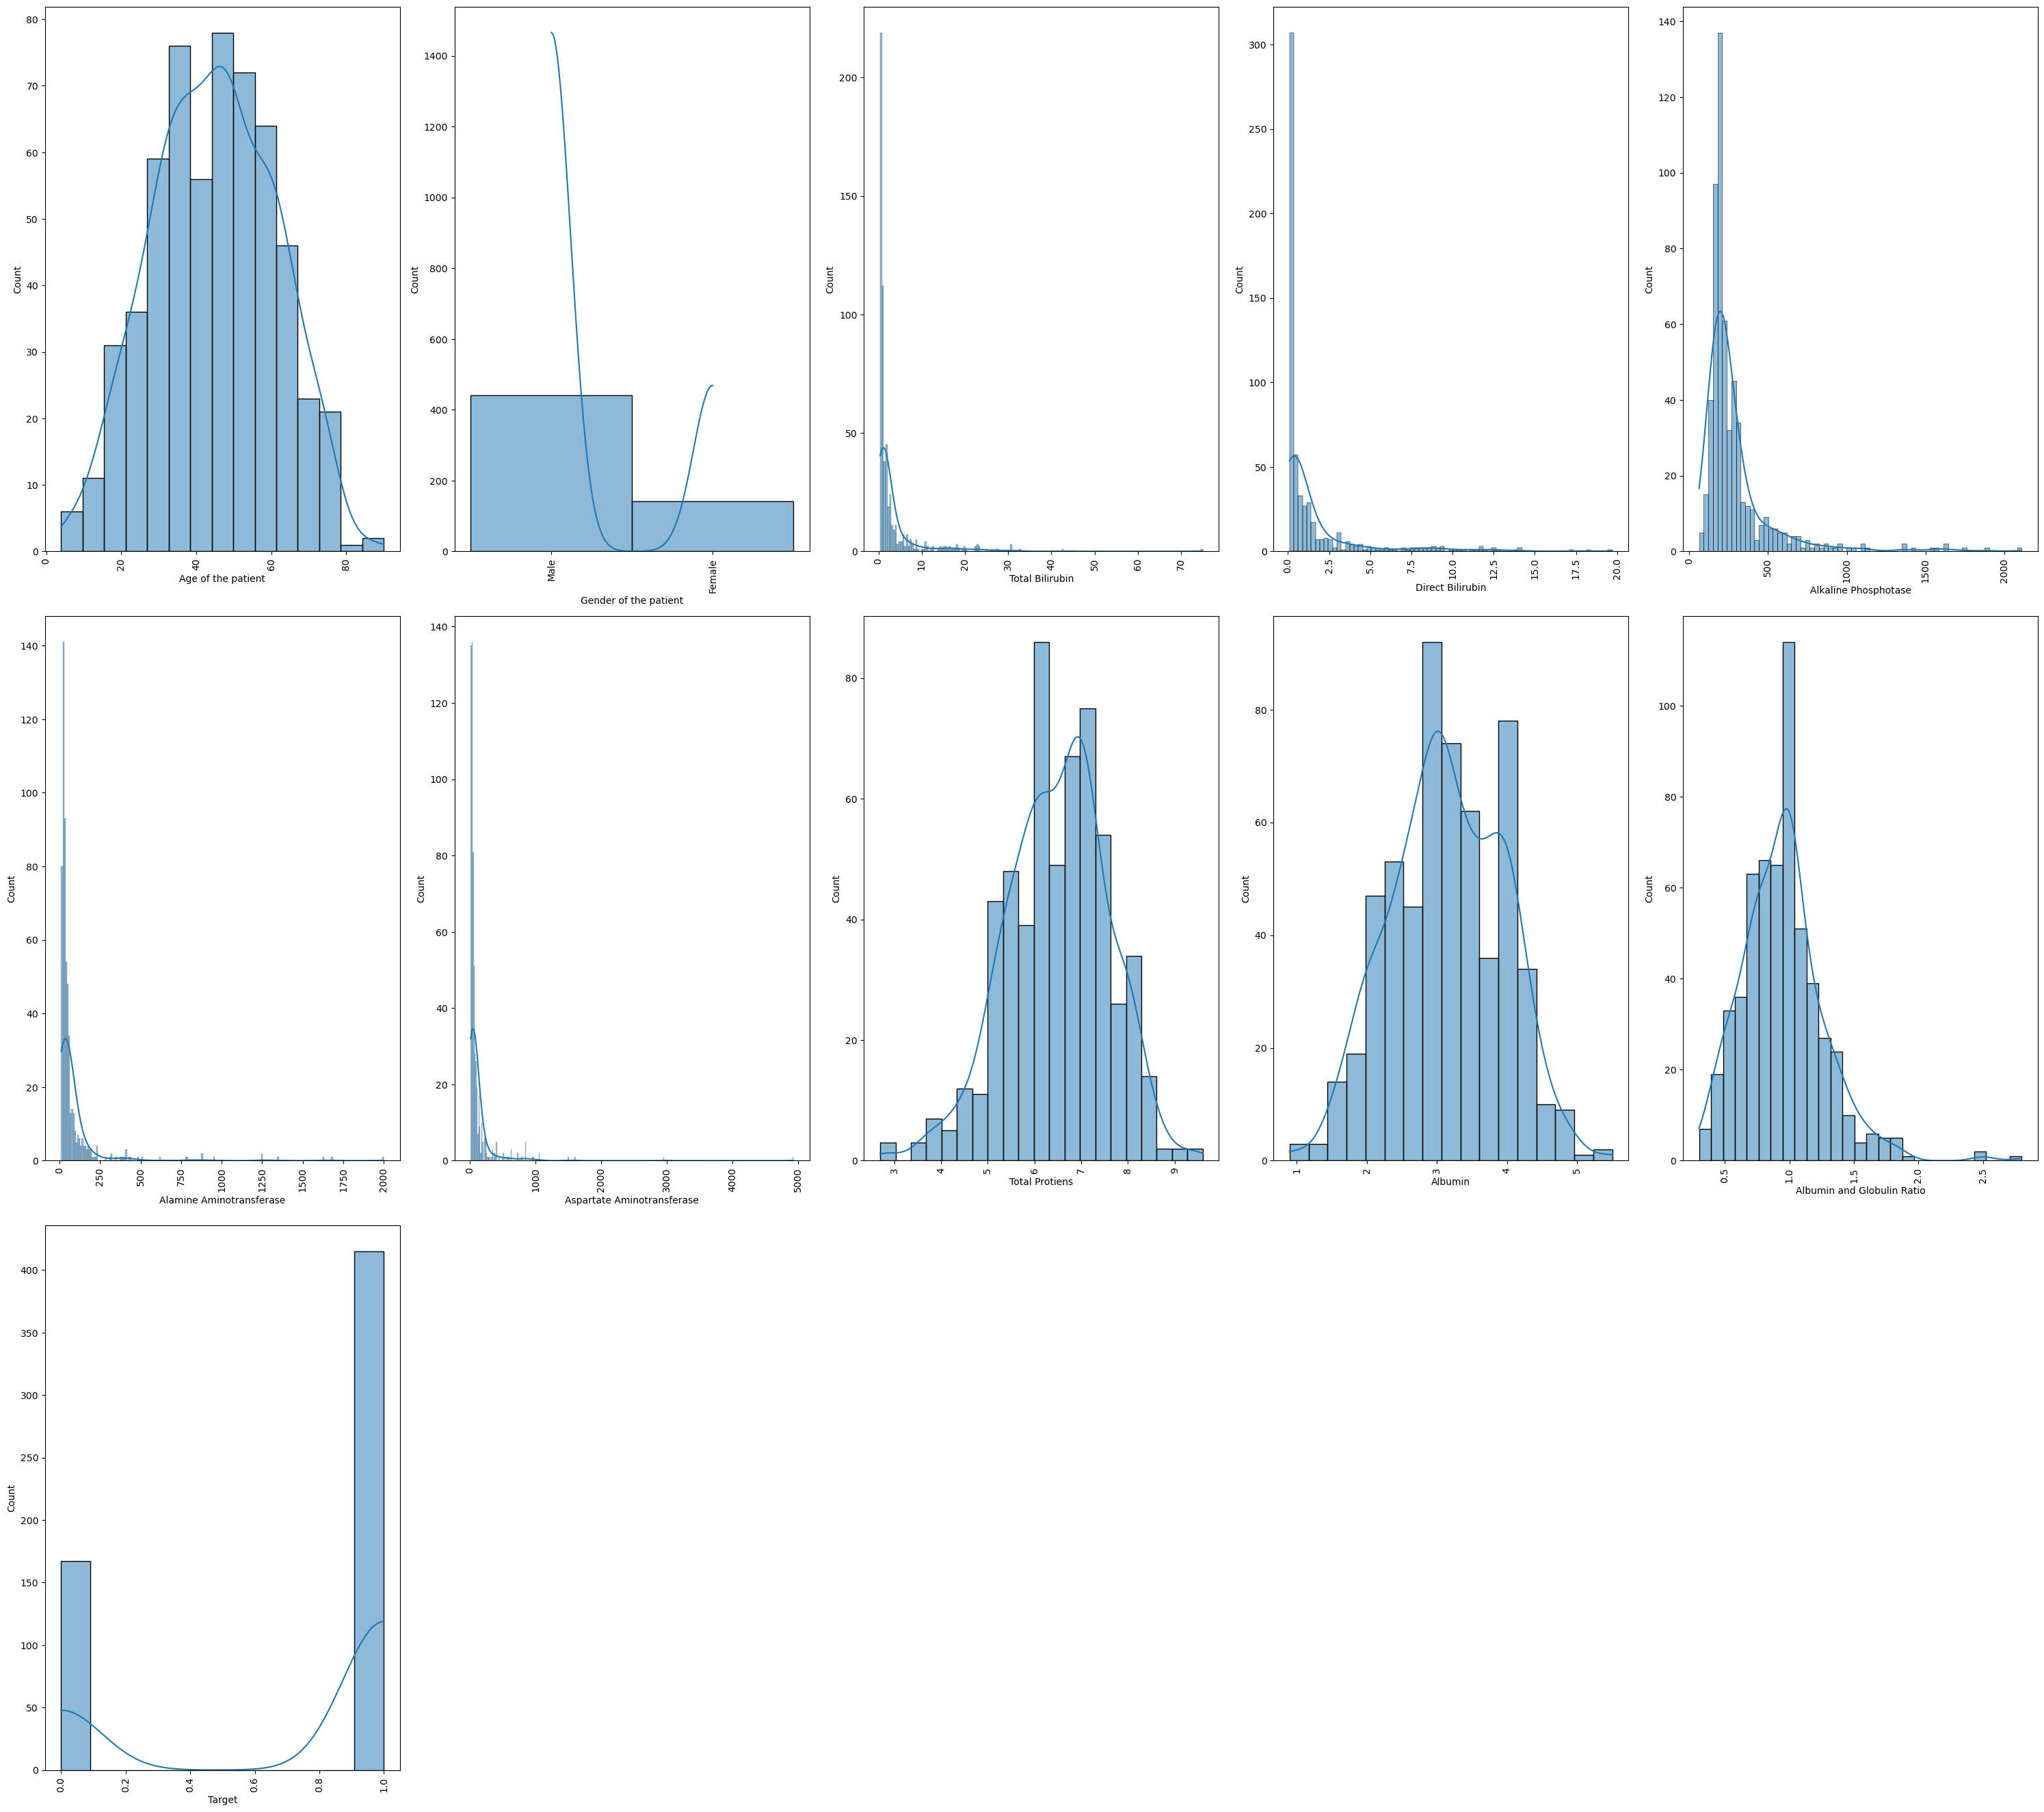

In [13]:
plt.figure(figsize=(30,35))
plotnumber=1
for column in df:
    ax=plt.subplot(4,5,plotnumber)
    sns.histplot(x=df[column],kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

# Data Preprocessing:

In [14]:
df.isnull().sum()

Age of the patient            0
Gender of the patient         0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Target                        0
dtype: int64

There are 4 null values present in the data.

In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

Age of the patient            0
Gender of the patient         0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine Aminotransferase      0
Aspartate Aminotransferase    0
Total Protiens                0
Albumin                       0
Albumin and Globulin Ratio    0
Target                        0
dtype: int64

In [17]:
df1=df.copy()

In [18]:
df1

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Conversion of Categorical to Numerical Column:

In [19]:
df1['Gender of the patient'].value_counts()

Male      439
Female    139
Name: Gender of the patient, dtype: int64

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

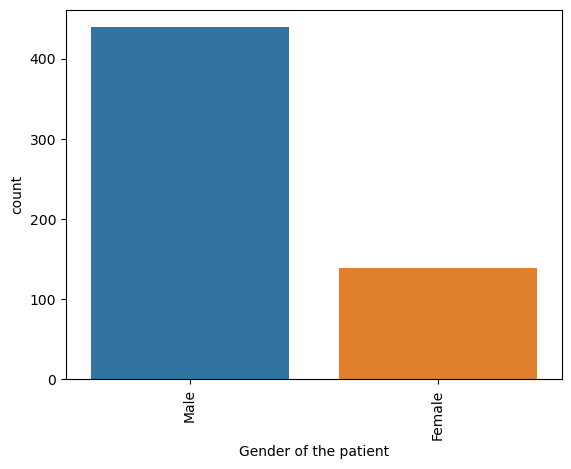

In [20]:
sns.countplot(x='Gender of the patient',data=df)
plt.xticks(rotation=90)

Here in this data there are more number of males present than the women.

In [21]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
578,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [22]:
data2=pd.get_dummies(df['Gender of the patient'],prefix='Gender of the patient',drop_first=True)
df=pd.concat([data2,df],axis=1).drop(['Gender of the patient'],axis=1)

In [23]:
df

,Gender of the patient_Male,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Target
0,1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,1,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
3,1,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1
4,1,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1
...,...,...,...,...,...,...,...,...,...,...,...
577,1,60,0.5,0.1,500,20,34,5.9,1.6,0.37,0
578,1,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1
579,1,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1
580,1,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Finding the Outliers:

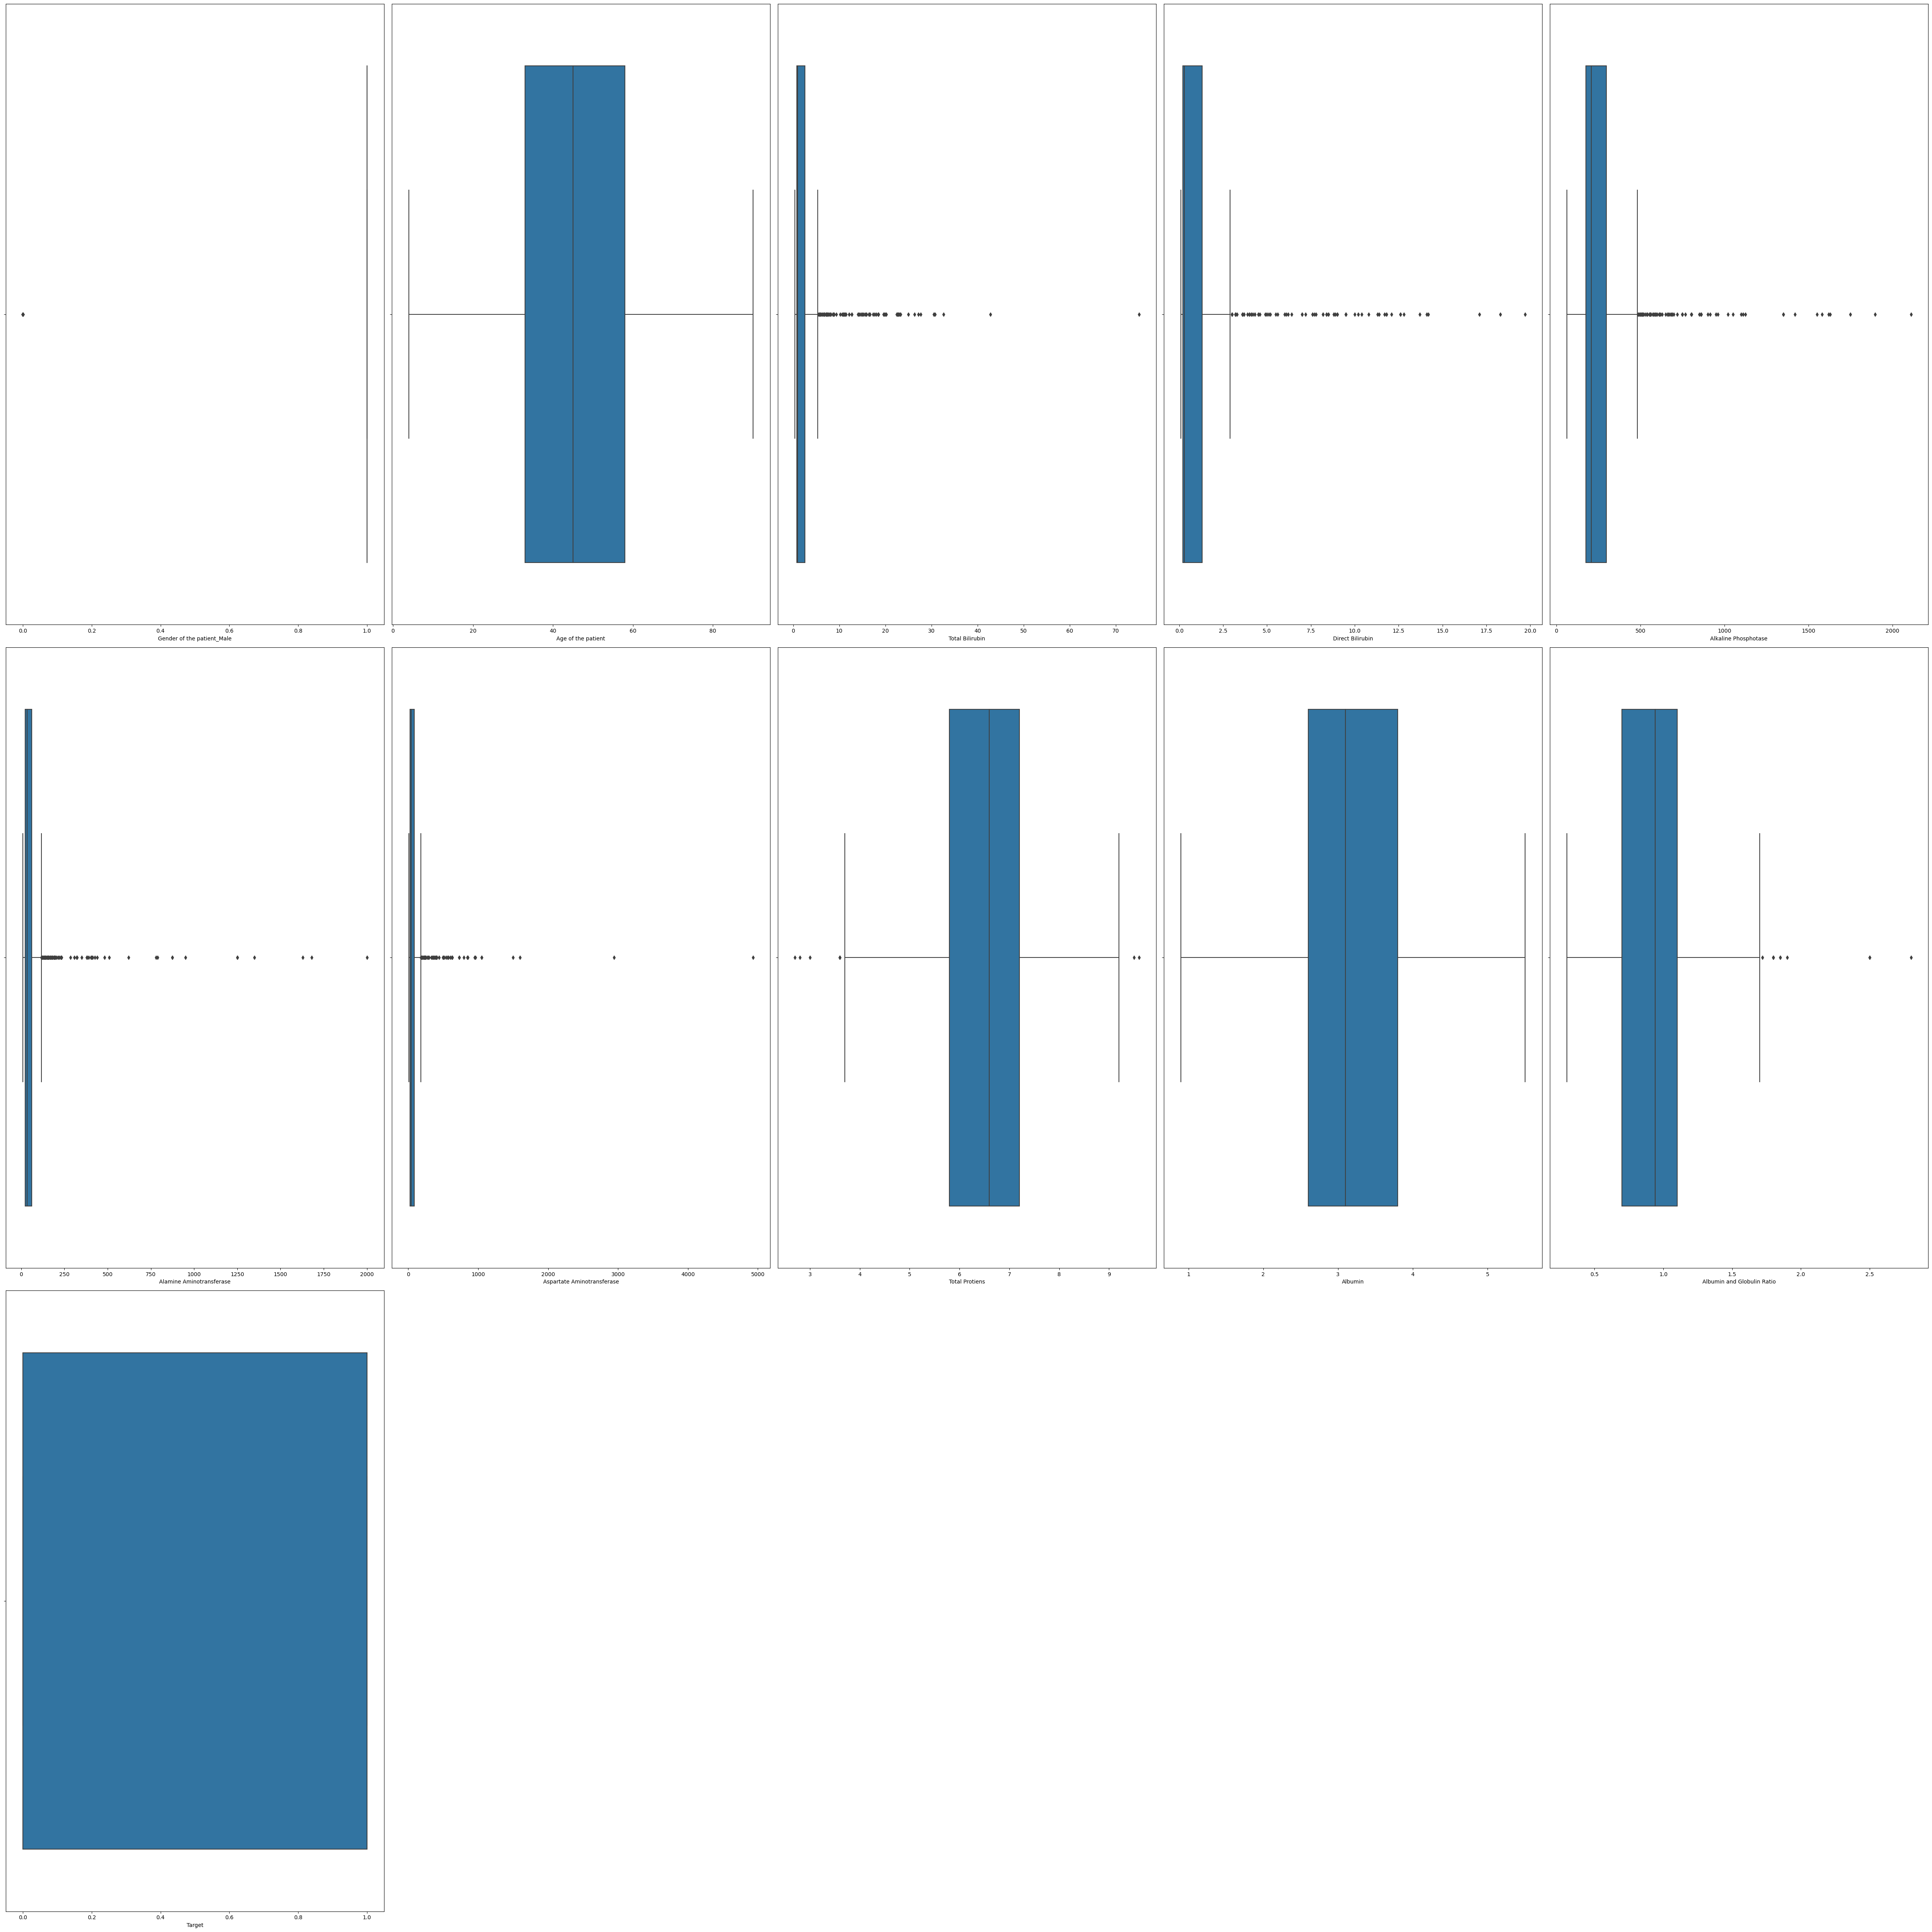

In [24]:
plt.figure(figsize=(50,50))
i=1
for column in df:
    plt.subplot(3,5,i)
    sns.boxplot(x=df[column],data=df)
    i=i+1
plt.tight_layout()

Data has outliers so we need to handle the outliers.

In [25]:
df.columns

Index(['Gender of the patient_Male', 'Age of the patient', 'Total Bilirubin',
       'Direct Bilirubin', 'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin',
       'Albumin and Globulin Ratio', 'Target'],
      dtype='object')

In [26]:
df.rename(columns={'Age of the patient': 'Age_of_the_patient','Gender of the patient_Male':'Gender_of_the_patient',
                   'Total Bilirubin':'Total_Bilirubin','Direct Bilirubin':'Direct_Bilirubin','Alkaline Phosphotase':'Alkaline_Phosphotase',
                   'Alamine Aminotransferase':'Alamine_Aminotransferase','Aspartate Aminotransferase':'Aspartate_Aminotransferase',
                   'Total Protiens':'Total_Protiens','Albumin':'albumin','Albumin and Globulin Ratio':'Albumin_and_Globulin_Ratio',
                   'Target':'target'}, inplace=True)

In [27]:
## using IQR to remove the outliers
from scipy import stats
IQR = stats.iqr(df.Age_of_the_patient, interpolation = 'midpoint') 

IQR

25.0

In [28]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df.Age_of_the_patient.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Age_of_the_patient.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [29]:
len(df.loc[df['Age_of_the_patient']>max_limit])/len(df)

0.0

In [30]:
len(df.loc[df['Age_of_the_patient']<min_limit])/len(df)

0.0

In [31]:
## min and max limit calculation

# First quartile (Q1) 
Q1 = df.Total_Bilirubin.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Total_Bilirubin.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [32]:
len(df.loc[df['Total_Bilirubin']>max_limit])/len(df)

0.0034602076124567475

In [33]:
len(df.loc[df['Total_Bilirubin']<min_limit])/len(df)

0.0

Here the Outlier Percentage is less than 5% so we should replace it with the median value

In [34]:
df.loc[df['Total_Bilirubin']<min_limit,'Total_Bilirubin']=np.median(df.Total_Bilirubin)

Checking outliers for Direct_Bilirubin:

In [35]:
# First quartile (Q1) 
Q1 = df.Direct_Bilirubin.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Direct_Bilirubin.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [36]:
len(df.loc[df['Direct_Bilirubin']>max_limit])/len(df)

0.0

In [37]:
len(df.loc[df['Direct_Bilirubin']<min_limit])/len(df)

0.0

Checking outliers for Alkaline_Phosphotase:

In [38]:
# First quartile (Q1) 
Q1 = df.Alkaline_Phosphotase.quantile(0.25)

# Third quartile (Q3) 
Q3 =df.Alkaline_Phosphotase.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [39]:
len(df.loc[df['Alkaline_Phosphotase']>max_limit])/len(df)

0.19204152249134948

In [40]:
len(df.loc[df['Alkaline_Phosphotase']<min_limit])/len(df)

0.05190311418685121

Here the outliers percentage is greater than 5% so we skip this because replacing this Outliers may affect the accuracy

Checking Outliers for Alamine_Aminotransferase:

In [41]:
# First quartile (Q1) 
Q1 = df. Alamine_Aminotransferase.quantile(0.25)

# Third quartile (Q3) 
Q3 =df. Alamine_Aminotransferase.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [42]:
len(df.loc[df['Alamine_Aminotransferase']>max_limit])/len(df)

0.14705882352941177

In [43]:
len(df.loc[df['Alamine_Aminotransferase']<min_limit])/len(df)

0.0

Here the outliers percentage is greater than 5% so we skip this because replacing this Outliers may affect the accuracy

Checking Outliers for Aspartate_Aminotransferase:

In [44]:
# First quartile (Q1) 
Q1 = df. Aspartate_Aminotransferase.quantile(0.25)

# Third quartile (Q3) 
Q3 =df. Aspartate_Aminotransferase.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [45]:
len(df.loc[df['Aspartate_Aminotransferase']>max_limit])/len(df)

0.17993079584775087

In [46]:
len(df.loc[df['Aspartate_Aminotransferase']<min_limit])/len(df)

0.0

Here the outliers percentage is greater than 5% so we skip this because replacing this Outliers may affect the accuracy

Checking Outliers for Total_Protiens:

In [47]:
# First quartile (Q1) 
Q1 = df. Total_Protiens.quantile(0.25)

# Third quartile (Q3) 
Q3 =df. Total_Protiens.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [48]:
len(df.loc[df['Total_Protiens']>max_limit])/len(df)

0.0

In [49]:
len(df.loc[df['Total_Protiens']<min_limit])/len(df)

0.0

Checking Outliers for Albumin_and_Globulin_Ratio:

In [50]:
# First quartile (Q1) 
Q1 = df. Albumin_and_Globulin_Ratio.quantile(0.25)

# Third quartile (Q3) 
Q3 =df. Albumin_and_Globulin_Ratio.quantile(0.75)

##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [51]:
len(df.loc[df['Albumin_and_Globulin_Ratio']>max_limit])/len(df)

0.0

In [52]:
len(df.loc[df['Albumin_and_Globulin_Ratio']<min_limit])/len(df)

0.0

Outliers for each column has been changed 

# Feature Engineering:

In [53]:
df.columns

Index(['Gender_of_the_patient', 'Age_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'albumin',
       'Albumin_and_Globulin_Ratio', 'target'],
      dtype='object')

In [54]:
# checking correlation
# Correlation Only for Continous Data so We extract the continous data for correlation  and also drop the target
Corr_data=df[['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'albumin',
       'Albumin_and_Globulin_Ratio']]

In [55]:
Corr_data.corr()

,Age_of_the_patient,Gender_of_the_patient,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,albumin,Albumin_and_Globulin_Ratio
Age_of_the_patient,1.000000,0.059946,0.011925,0.007866,0.079924,-0.087158,-0.019839,-0.187148,-0.265016,-0.216386
Gender_of_the_patient,0.059946,1.000000,0.087030,0.097929,-0.030770,0.080476,0.078664,-0.094513,-0.095218,-0.003886
Total_Bilirubin,0.011925,0.087030,1.000000,0.874440,0.205491,0.213173,0.237148,-0.007694,-0.221980,-0.206410
Direct_Bilirubin,0.007866,0.097929,0.874440,1.000000,0.233727,0.232950,0.256826,0.000285,-0.228291,-0.200297
Alkaline_Phosphotase,0.079924,-0.030770,0.205491,0.233727,1.000000,0.124546,0.166384,-0.026850,-0.163300,-0.234318
Alamine_Aminotransferase,-0.087158,0.080476,0.213173,0.232950,0.124546,1.000000,0.791822,-0.042259,-0.028536,-0.002466
Aspartate_Aminotransferase,-0.019839,0.078664,0.237148,0.256826,0.166384,0.791822,1.000000,-0.025593,-0.084813,-0.070129
Total_Protiens,-0.187148,-0.094513,-0.007694,0.000285,-0.026850,-0.042259,-0.025593,1.000000,0.783095,0.234984
albumin,-0.265016,-0.095218,-0.221980,-0.228291,-0.163300,-0.028536,-0.084813,0.783095,1.000000,0.689722
Albumin_and_Globulin_Ratio,-0.216386,-0.003886,-0.206410,-0.200297,-0.234318,-0.002466,-0.070129,0.234984,0.689722,1.000000


Text(0.5, 1.0, 'Correlation between the features')

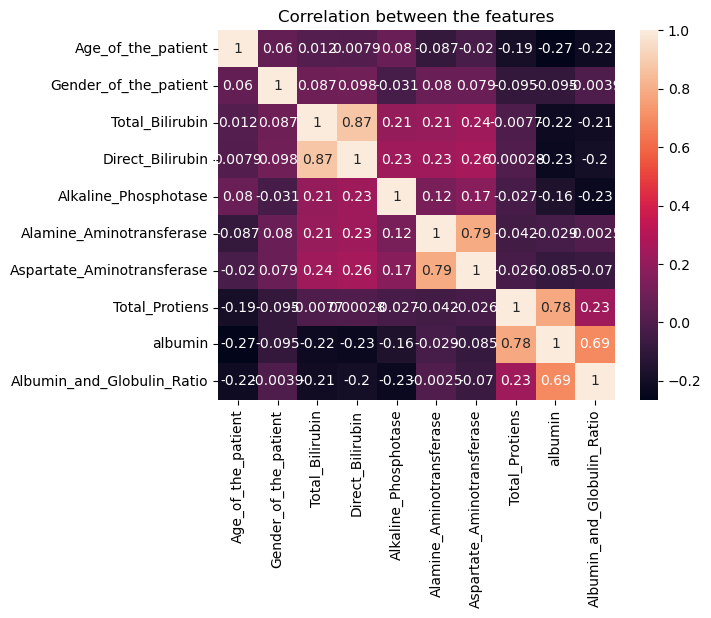

In [56]:
sns.heatmap(Corr_data.corr(),annot=True)
plt.title("Correlation between the features")

Here there is no corelation between the features.

# Data Analysis:

# Model Creation:

In [57]:
x=df.drop('target',axis=1)
y=df[['target']]

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.30)

# LOGISTIC REGRESSION:

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_predict=lr.predict(x_test)

# Model Evaluation:

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [62]:
cm=confusion_matrix(y_test,y_predict)
print(cm)

[[ 10  37]
 [ 15 112]]


In [63]:
log_acc_sc=accuracy_score(y_test,y_predict)
print(log_acc_sc)

0.7011494252873564


In [64]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.40      0.21      0.28        47
           1       0.75      0.88      0.81       127

    accuracy                           0.70       174
   macro avg       0.58      0.55      0.54       174
weighted avg       0.66      0.70      0.67       174



# KNN REGRESSOR:

In [65]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)

In [66]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [67]:
y_predict=KNN.predict(x_test)

# Model Evaluation:

In [68]:
knn_acc_sc=accuracy_score(y_test,y_predict)
print(knn_acc_sc)

0.6781609195402298


In [69]:
cr=classification_report(y_predict,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.32      0.38      0.35        39
           1       0.81      0.76      0.79       135

    accuracy                           0.68       174
   macro avg       0.57      0.57      0.57       174
weighted avg       0.70      0.68      0.69       174



# Decision Tree:

In [70]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [71]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [72]:
y_predict=DT.predict(x_test)

# Model Evaluation:

In [73]:
dt_acc_sc=accuracy_score(y_test,y_predict)
print(dt_acc_sc)

0.6666666666666666


In [74]:
cr=classification_report(y_test,y_predict)

In [75]:
print(cr)

              precision    recall  f1-score   support

           0       0.39      0.43      0.41        47
           1       0.78      0.76      0.77       127

    accuracy                           0.67       174
   macro avg       0.59      0.59      0.59       174
weighted avg       0.68      0.67      0.67       174



# Hyperparametric Tunning for Decision Tree Classifier:

In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
dt_regressor = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, scoring='r2', cv=5, verbose=2)
grid_search.fit(x, y)
best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[

In [77]:
dtcls=DecisionTreeClassifier(max_depth= 10,max_features='auto',min_samples_leaf=2,min_samples_split=10)

In [78]:
dtcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10)

In [79]:
y_predict=dtcls.predict(x_test)

# Model Evaluation:

In [80]:
dt_acc_sc=accuracy_score(y_test,y_predict)
print(dt_acc_sc)

0.6724137931034483


In [81]:
cr=classification_report(y_predict,y_test)

In [82]:
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.41      0.44        54
           1       0.75      0.79      0.77       120

    accuracy                           0.67       174
   macro avg       0.61      0.60      0.60       174
weighted avg       0.66      0.67      0.67       174



# Random Forest Classifier:

In [83]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [84]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [85]:
y_predict=RFC.predict(x_test)

# Model Evaluation:

In [86]:
rfc_acc_sc=accuracy_score(y_test,y_predict)
print(rfc_acc_sc)

0.7298850574712644


In [87]:
cr=classification_report(y_predict,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.34      0.50      0.41        32
           1       0.87      0.78      0.83       142

    accuracy                           0.73       174
   macro avg       0.61      0.64      0.62       174
weighted avg       0.78      0.73      0.75       174



# Hyperparametric tunning for Random Forest Classifier:

In [88]:
#initializie the libraries and parameters
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(start=10,stop=100,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

In [89]:
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}
rf_ht=RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=RFC, param_distributions=random_grid, n_iter=100, cv=3, verbose=1,
                            random_state=42, n_jobs=-1, scoring='r2')
rf_cv.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='r2', verbose=1)

In [90]:
rf_best_params=rf_cv.best_params_
print(f"best_params:{rf_best_params}")

best_params:{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 82, 'bootstrap': True}


In [91]:
rfc1=RandomForestClassifier(n_estimators=200,max_features='sqrt',max_depth=46,min_samples_split=2,
                           min_samples_leaf=1,random_state=42,bootstrap=True)

In [92]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=46, n_estimators=200, random_state=42)

In [93]:
y_predict=rfc1.predict(x_test)

# Model Evaluation:

In [94]:
rfc_acc_sc=accuracy_score(y_predict,y_test)
print(rfc_acc_sc)

0.7068965517241379


In [95]:
cr=classification_report(y_predict,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.34      0.44      0.39        36
           1       0.84      0.78      0.81       138

    accuracy                           0.71       174
   macro avg       0.59      0.61      0.60       174
weighted avg       0.74      0.71      0.72       174



# Gradient Boosting:

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [97]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [98]:
y_predict=GBC.predict(x_test)

# Model Evaluation:

In [99]:
gb_acc_sc=accuracy_score(y_predict,y_test)
print(gb_acc_sc)

0.7298850574712644


In [100]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        47
           1       0.79      0.86      0.82       127

    accuracy                           0.73       174
   macro avg       0.64      0.62      0.63       174
weighted avg       0.71      0.73      0.72       174



# XG Boosting:

In [101]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [102]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [103]:
y_pred=xgb.predict(x_test)

# Model Evaluation:

In [104]:
xgb_acc_sc=accuracy_score(y_predict,y_test)

In [105]:
print(xgb_acc_sc)

0.7298850574712644


In [106]:
cr=classification_report(y_predict,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        36
           1       0.86      0.79      0.82       138

    accuracy                           0.73       174
   macro avg       0.62      0.64      0.63       174
weighted avg       0.76      0.73      0.74       174



# Hyperparametric Tunning for XG Boosting:

In [107]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={ 'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
xbg2=XGBClassifier(random_state=42)
xgb_cv=RandomizedSearchCV(estimator=xbg2,param_distributions=param_grid,n_iter=100,cv=3,verbose=1,
                          random_state=42,n_jobs=-1,scoring='r2')
xgb_cv.fit(x,y)
cv_best_params=xgb_cv.best_params_
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'reg_lambda': 0.1, 'reg_alpha': 0.8, 'n_estimators': 115, 'max_depth': 10, 'learning_rate': 0.7, 'gamma': 25.6})


In [108]:
xgb2=XGBClassifier(reg_lambda=0.1,reg_alpha=0.8,n_estimators=115,max_depth=10,learning_rate=0.7,gamma=25.6,random_state=42)

In [109]:
xgb2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=25.6, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=115, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [110]:
y_predict=xgb2.predict(x_test)

# Model Evaluation:

In [111]:
xgb_acc_sc=accuracy_score(y_predict,y_test)
print(xgb_acc_sc)

0.7298850574712644


In [112]:
cr=classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.73      1.00      0.84       127

    accuracy                           0.73       174
   macro avg       0.36      0.50      0.42       174
weighted avg       0.53      0.73      0.62       174



# Final Report:

In [113]:
scores=[log_acc_sc,knn_acc_sc,dt_acc_sc,rfc_acc_sc,gb_acc_sc,xgb_acc_sc]
algorithms=['LogisticRegression','KNN','DecisionTree','RandomForest','GradientBoosting','XGBoosting']
for i in range(len(algorithms)):
    print("The Accuracy Score acheived using " + algorithms[i] + ' is: ' + str(scores[i])+"%")

The Accuracy Score acheived using LogisticRegression is: 0.7011494252873564%
The Accuracy Score acheived using KNN is: 0.6781609195402298%
The Accuracy Score acheived using DecisionTree is: 0.6724137931034483%
The Accuracy Score acheived using RandomForest is: 0.7068965517241379%
The Accuracy Score acheived using GradientBoosting is: 0.7298850574712644%
The Accuracy Score acheived using XGBoosting is: 0.7298850574712644%
